# Comparison between models Presentation

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch
from torch_geometric.data import Data
from rdkit import Chem
from rdkit.Chem.rdmolops import GetAdjacencyMatrix
from preprocessing.featurisation import get_atom_features, get_bond_features
from preprocessing.fetch_smiles import resolve_smiles_by_cas_interactive
from preprocessing.smiles_to_graph import batch_from_csv


In [34]:
graph_list = batch_from_csv("data/processed/input.csv")
graph_list[:5]

[Data(x=[8, 79], edge_index=[2, 16], edge_attr=[16, 10], y=[1]),
 Data(x=[11, 79], edge_index=[2, 24], edge_attr=[24, 10], y=[1]),
 Data(x=[10, 79], edge_index=[2, 22], edge_attr=[22, 10], y=[1]),
 Data(x=[5, 79], edge_index=[2, 10], edge_attr=[10, 10], y=[1]),
 Data(x=[10, 79], edge_index=[2, 18], edge_attr=[18, 10], y=[1])]

In [22]:
num_node_features = graph_list[0].num_node_features
num_edge_features = graph_list[0].num_edge_features
avg_degree = 2*(graph_list[0].num_edges) / graph_list[0].num_nodes
print(f"Number of node features: {num_node_features}")
print(f"Average degree of the graph: {avg_degree:.2f}") # From the avg. degree we can use at least 4 GCNConv layers
print(f"Number of edge features: {num_edge_features}")


Number of node features: 79
Average degree of the graph: 4.00
Number of edge features: 10


In [23]:
from torch_geometric.loader import DataLoader
from models.gcn_model import GCNModel, train_gcn_model_batched, plot_predictions
from models.gat_model import GATModel, train_gat_model, plot_predictionsGAT
from models.attentiveFP_model import AttentiveFPModel, train_attFP_model, plot_predictions_attFP

model_gcn = GCNModel(in_channels=num_node_features, hidden_dim=64, out_dim=1)
model_gat = GATModel(in_channels=num_node_features, hidden_dim=64, out_dim=1)
model_attFP = AttentiveFPModel(node_dim=num_node_features, edge_dim=num_edge_features, hidden_dim=64, out_dim=1)

loader = DataLoader(graph_list, batch_size=32, shuffle=True)
print(model_gcn)
print(model_gat)
print(model_attFP)

GCNModel(
  (conv1): GCNConv(79, 64)
  (ffnn): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=1, bias=True)
  )
)
GATModel(
  (conv1): GATConv(79, 64, heads=2)
  (ffnn): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=1, bias=True)
  )
)
AttentiveFPModel(
  (attentivefp): AttentiveFP(in_channels=79, hidden_channels=64, out_channels=64, edge_dim=10, num_layers=1, num_timesteps=2)
  (ffnn): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=1, bias=True)
  )
)


In [32]:
mol_to_predict = [graph_list[23]]
mol_to_predict

[Data(x=[11, 79], edge_index=[2, 22], edge_attr=[22, 10], y=[1])]

In [39]:
def visualize_graph(G, color=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


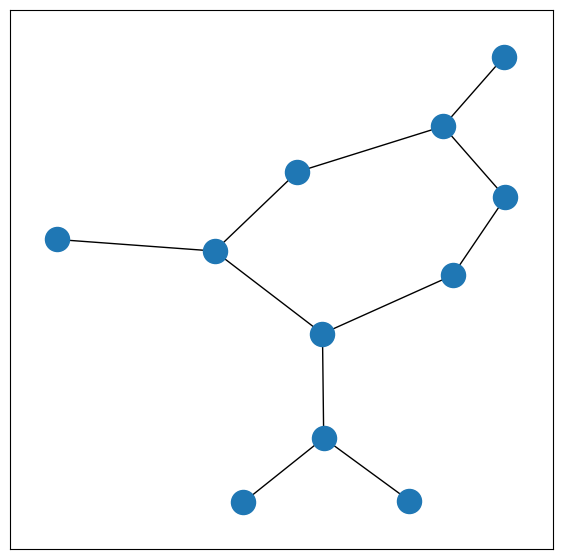

In [42]:
from torch_geometric.utils import to_networkx
G = to_networkx(mol_to_predict[0], to_undirected=True)
visualize_graph(G)

In [25]:
train_gcn_model_batched(loader, model_gcn, epochs=300, lr=1e-3)


Epoch 1, Loss: 165.9263
Epoch 2, Loss: 109.5272
Epoch 3, Loss: 126.9825
Epoch 4, Loss: 120.1296
Epoch 5, Loss: 97.6811
Epoch 6, Loss: 135.6055
Epoch 7, Loss: 127.1118
Epoch 8, Loss: 112.4130
Epoch 9, Loss: 82.9634
Epoch 10, Loss: 121.2425
Epoch 11, Loss: 93.2699
Epoch 12, Loss: 105.1339
Epoch 13, Loss: 90.9723
Epoch 14, Loss: 85.5986
Epoch 15, Loss: 71.9530
Epoch 16, Loss: 140.8787
Epoch 17, Loss: 98.5893
Epoch 18, Loss: 74.1548
Epoch 19, Loss: 112.5662
Epoch 20, Loss: 97.3979
Epoch 21, Loss: 86.6928
Epoch 22, Loss: 72.6868
Epoch 23, Loss: 108.9363
Epoch 24, Loss: 95.6898
Epoch 25, Loss: 88.4117
Epoch 26, Loss: 82.4687
Epoch 27, Loss: 70.0826
Epoch 28, Loss: 77.1434
Epoch 29, Loss: 77.1257
Epoch 30, Loss: 96.2336
Epoch 31, Loss: 105.2169
Epoch 32, Loss: 84.4421
Epoch 33, Loss: 75.1811
Epoch 34, Loss: 97.3351
Epoch 35, Loss: 87.9966
Epoch 36, Loss: 80.1517
Epoch 37, Loss: 82.1805
Epoch 38, Loss: 93.6404
Epoch 39, Loss: 116.5598
Epoch 40, Loss: 85.6638
Epoch 41, Loss: 122.3667
Epoch 42, 

GCNModel(
  (conv1): GCNConv(79, 64)
  (ffnn): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [27]:
train_gat_model(loader, model_gat, epochs=300, lr=1e-3)

Epoch 1, Loss: 101.2066
Epoch 2, Loss: 122.9926
Epoch 3, Loss: 116.9714
Epoch 4, Loss: 151.4486
Epoch 5, Loss: 106.2317
Epoch 6, Loss: 113.9138
Epoch 7, Loss: 104.6945
Epoch 8, Loss: 88.6575
Epoch 9, Loss: 103.3273
Epoch 10, Loss: 109.0406
Epoch 11, Loss: 95.0260
Epoch 12, Loss: 76.8302
Epoch 13, Loss: 80.9371
Epoch 14, Loss: 129.0010
Epoch 15, Loss: 141.4638
Epoch 16, Loss: 93.8731
Epoch 17, Loss: 102.3101
Epoch 18, Loss: 84.4738
Epoch 19, Loss: 98.5509
Epoch 20, Loss: 79.5450
Epoch 21, Loss: 85.2763
Epoch 22, Loss: 84.4513
Epoch 23, Loss: 89.2699
Epoch 24, Loss: 104.9075
Epoch 25, Loss: 89.9419
Epoch 26, Loss: 110.6664
Epoch 27, Loss: 86.0457
Epoch 28, Loss: 76.9008
Epoch 29, Loss: 87.3586
Epoch 30, Loss: 74.9744
Epoch 31, Loss: 105.0167
Epoch 32, Loss: 90.6462
Epoch 33, Loss: 85.8696
Epoch 34, Loss: 91.8587
Epoch 35, Loss: 93.7931
Epoch 36, Loss: 100.9704
Epoch 37, Loss: 119.7730
Epoch 38, Loss: 99.4276
Epoch 39, Loss: 91.9034
Epoch 40, Loss: 87.5935
Epoch 41, Loss: 74.0216
Epoch 42

GATModel(
  (conv1): GATConv(79, 64, heads=2)
  (ffnn): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [28]:
train_attFP_model(model_attFP, loader, epochs=300, lr=1e-3)

Epoch 1: Loss = 111.2912
Epoch 2: Loss = 97.0848
Epoch 3: Loss = 108.8364
Epoch 4: Loss = 106.4508
Epoch 5: Loss = 106.9404
Epoch 6: Loss = 116.2053
Epoch 7: Loss = 113.9068
Epoch 8: Loss = 101.1170
Epoch 9: Loss = 84.5046
Epoch 10: Loss = 123.5371
Epoch 11: Loss = 96.5279
Epoch 12: Loss = 108.4836
Epoch 13: Loss = 104.5023
Epoch 14: Loss = 83.7273
Epoch 15: Loss = 116.4614
Epoch 16: Loss = 96.2752
Epoch 17: Loss = 88.6804
Epoch 18: Loss = 74.7585
Epoch 19: Loss = 94.1898
Epoch 20: Loss = 100.5158
Epoch 21: Loss = 105.7181
Epoch 22: Loss = 70.4244
Epoch 23: Loss = 69.1311
Epoch 24: Loss = 105.5119
Epoch 25: Loss = 69.1166
Epoch 26: Loss = 77.6228
Epoch 27: Loss = 71.4872
Epoch 28: Loss = 88.9605
Epoch 29: Loss = 100.9869
Epoch 30: Loss = 69.6348
Epoch 31: Loss = 70.8095
Epoch 32: Loss = 61.3517
Epoch 33: Loss = 59.7891
Epoch 34: Loss = 75.7481
Epoch 35: Loss = 53.7917
Epoch 36: Loss = 73.9367
Epoch 37: Loss = 55.9566
Epoch 38: Loss = 58.7833
Epoch 39: Loss = 49.7770
Epoch 40: Loss = 57

AttentiveFPModel(
  (attentivefp): AttentiveFP(in_channels=79, hidden_channels=64, out_channels=64, edge_dim=10, num_layers=1, num_timesteps=2)
  (ffnn): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [44]:
target_value = 1.2000
model_preds = [-0.4253, 0.386, 0.1755]

/var/folders/qw/tg_vq5y96136cpc4kkff4n480000gn/T/ipykernel_26301/2469245781.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


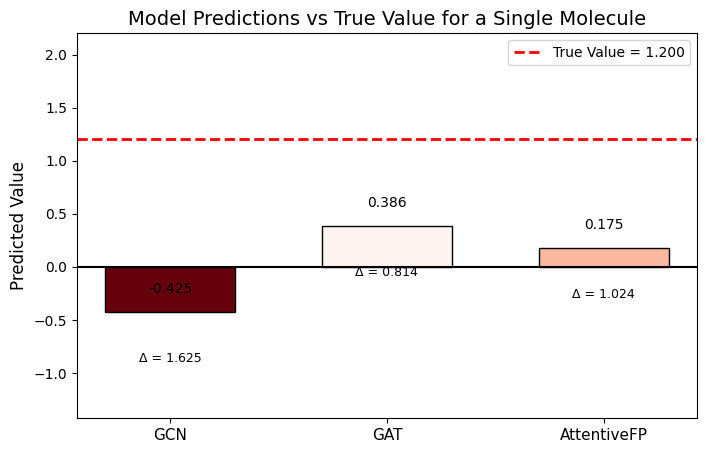

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# ==== INPUT ====
target_value = 1.2000
model_preds = [-0.4253, 0.386, 0.1755]
model_names = ["GCN", "GAT", "AttentiveFP"]

# ==== CALCULATIONS ====
errors = [abs(p - target_value) for p in model_preds]
x = np.arange(len(model_preds))

# Normalize errors for colormap
norm = mcolors.Normalize(vmin=min(errors), vmax=max(errors))
cmap = cm.get_cmap('Reds')
colors = [cmap(norm(e)) for e in errors]

# ==== PLOT ====
plt.figure(figsize=(8, 5))
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

# Draw bars
bars = plt.bar(x, model_preds, color=colors, edgecolor='black', width=0.6)

# Draw the true value as a red dashed line
plt.axhline(y=target_value, color='red', linestyle='--', linewidth=2, label=f'True Value = {target_value:.3f}')

# Annotate each bar
for i, (pred, err) in enumerate(zip(model_preds, errors)):
    # Prediction value on top
    plt.text(i, pred + 0.15, f"{pred:.3f}", ha='center', va='bottom', fontsize=10)
    # Error value below
    plt.text(i, pred - 0.5, f"Δ = {err:.3f}", ha='center', va='bottom', fontsize=9, color='black')

# ==== AXES & LABELS ====
plt.xticks(x, model_names, fontsize=11)
plt.ylabel("Predicted Value", fontsize=12)
plt.title("Model Predictions vs True Value for a Single Molecule", fontsize=14)
plt.ylim(min(model_preds) - 1.0, max([target_value] + model_preds) + 1.0)
plt.legend()


In [ ]:
x

[1, 0, 0, 0, 1]